
Dataset2:  Cardekho   Dataset


Load Data and Write script to perform following operations.

Task1: Consider the above data and perform preprocessing. 

In this task,we will first add all necessary libraries,after that we will do all the preprocessing work for cleaning our data...for preprocessing we can use mean for filling the missing values and filling the categorical data with the mode values...and encoding the categorical data for converting it to the numerical data...also printing the first five lines.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

#Load the data
data = pd.read_csv('cardekho_dataset.csv')  # Replace with your actual file path

# Data Preprocessing

# Handling missing values (if any)
print(data.isnull().sum())  # Check for missing values

# Fill missing values for numeric columns with the mean
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=[object]).columns  # Select categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill missing with the mode


# Handling categorical variables
label_encoder = LabelEncoder()
data['seller_type'] = label_encoder.fit_transform(data['seller_type'])  # Encoding 'seller_type'
data['fuel_type'] = label_encoder.fit_transform(data['fuel_type'])  # Encoding 'fuel_type'
data['transmission_type'] = label_encoder.fit_transform(data['transmission_type'])  # Encoding 'transmission_type'

# Check the data after preprocessing
print(data.head())



No                   0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
   No       car_name    brand     model  vehicle_age  km_driven  seller_type  \
0   0    Maruti Alto   Maruti      Alto            9     120000            1   
1   1  Hyundai Grand  Hyundai     Grand            5      20000            1   
2   2    Hyundai i20  Hyundai       i20           11      60000            1   
3   3    Maruti Alto   Maruti      Alto            9      37000            1   
4   4  Ford Ecosport     Ford  Ecosport            6      30000            0   

   fuel_type  transmission_type  mileage  engine  max_power  seats  \
0          4                  1    19.70     796      46.30      5   
1          4                  1    18.90    

Task2: Perform basic EDA for data analysis.

In this task, we will do the proper EDA which means Exploratory Data Analysis...from which we will find the insights of our data and also we will get to know the correlations of two different features with each other using the correlation heatmap.

By setting kde=True in sns.histplot, you're instructing Seaborn to add the KDE curve to your histogram. This curve provides a visual representation of the underlying distribution of the 'charges' data.

                 No   vehicle_age     km_driven   seller_type     fuel_type  \
count  15411.000000  15411.000000  1.541100e+04  15411.000000  15411.000000   
mean    9811.857699      6.036338  5.561648e+04      0.392252      2.474272   
std     5643.418542      3.013291  5.161855e+04      0.510743      1.523609   
min        0.000000      0.000000  1.000000e+02      0.000000      0.000000   
25%     4906.500000      4.000000  3.000000e+04      0.000000      1.000000   
50%     9872.000000      6.000000  5.000000e+04      0.000000      1.000000   
75%    14668.500000      8.000000  7.000000e+04      1.000000      4.000000   
max    19543.000000     29.000000  3.800000e+06      2.000000      4.000000   

       transmission_type       mileage        engine     max_power  \
count       15411.000000  15411.000000  15411.000000  15411.000000   
mean            0.793265     19.701151   1486.057751    100.588254   
std             0.404977      4.171265    521.106696     42.972979   
min     

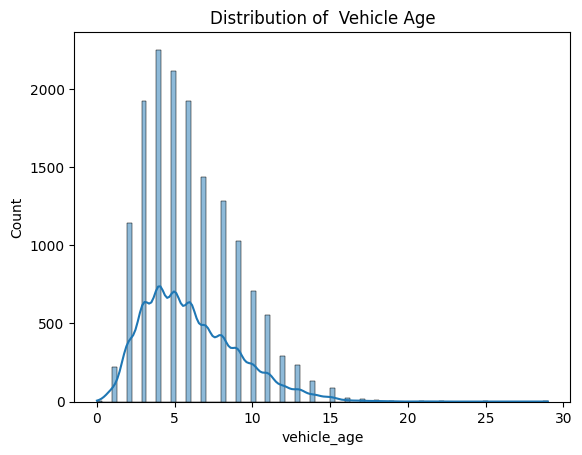

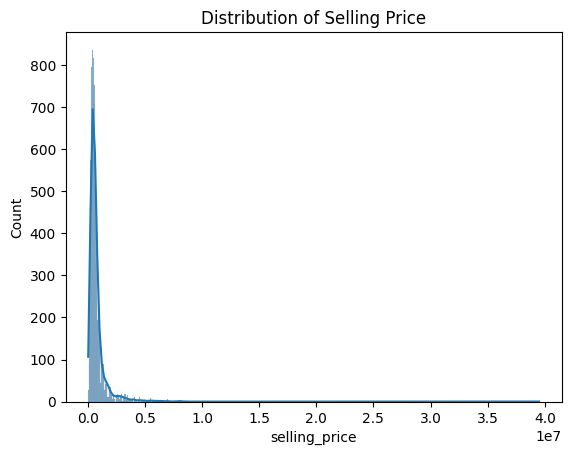

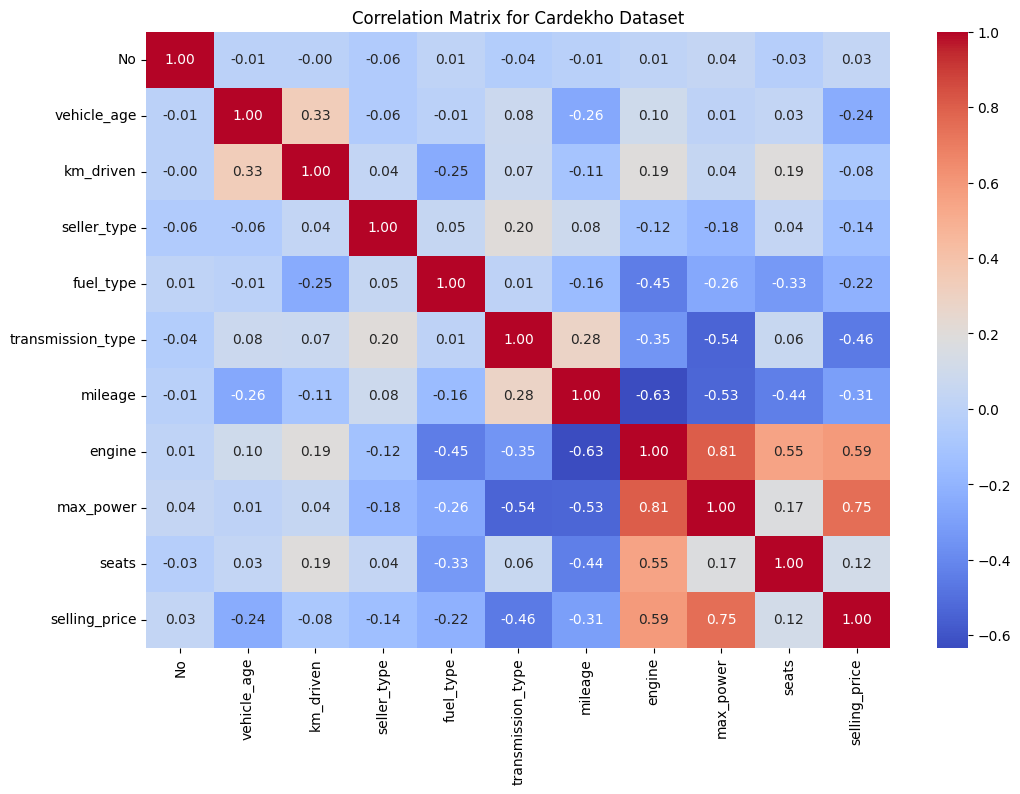

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying descriptive statistics
print(data.describe())

# Visualizing the distribution of vehicle_age and selling_price
sns.histplot(data['vehicle_age'], kde=True)
plt.title('Distribution of  Vehicle Age')
plt.show()

sns.histplot(data['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Cardekho Dataset')
plt.show()




Using pairplot for getting all the graphs of Max_power

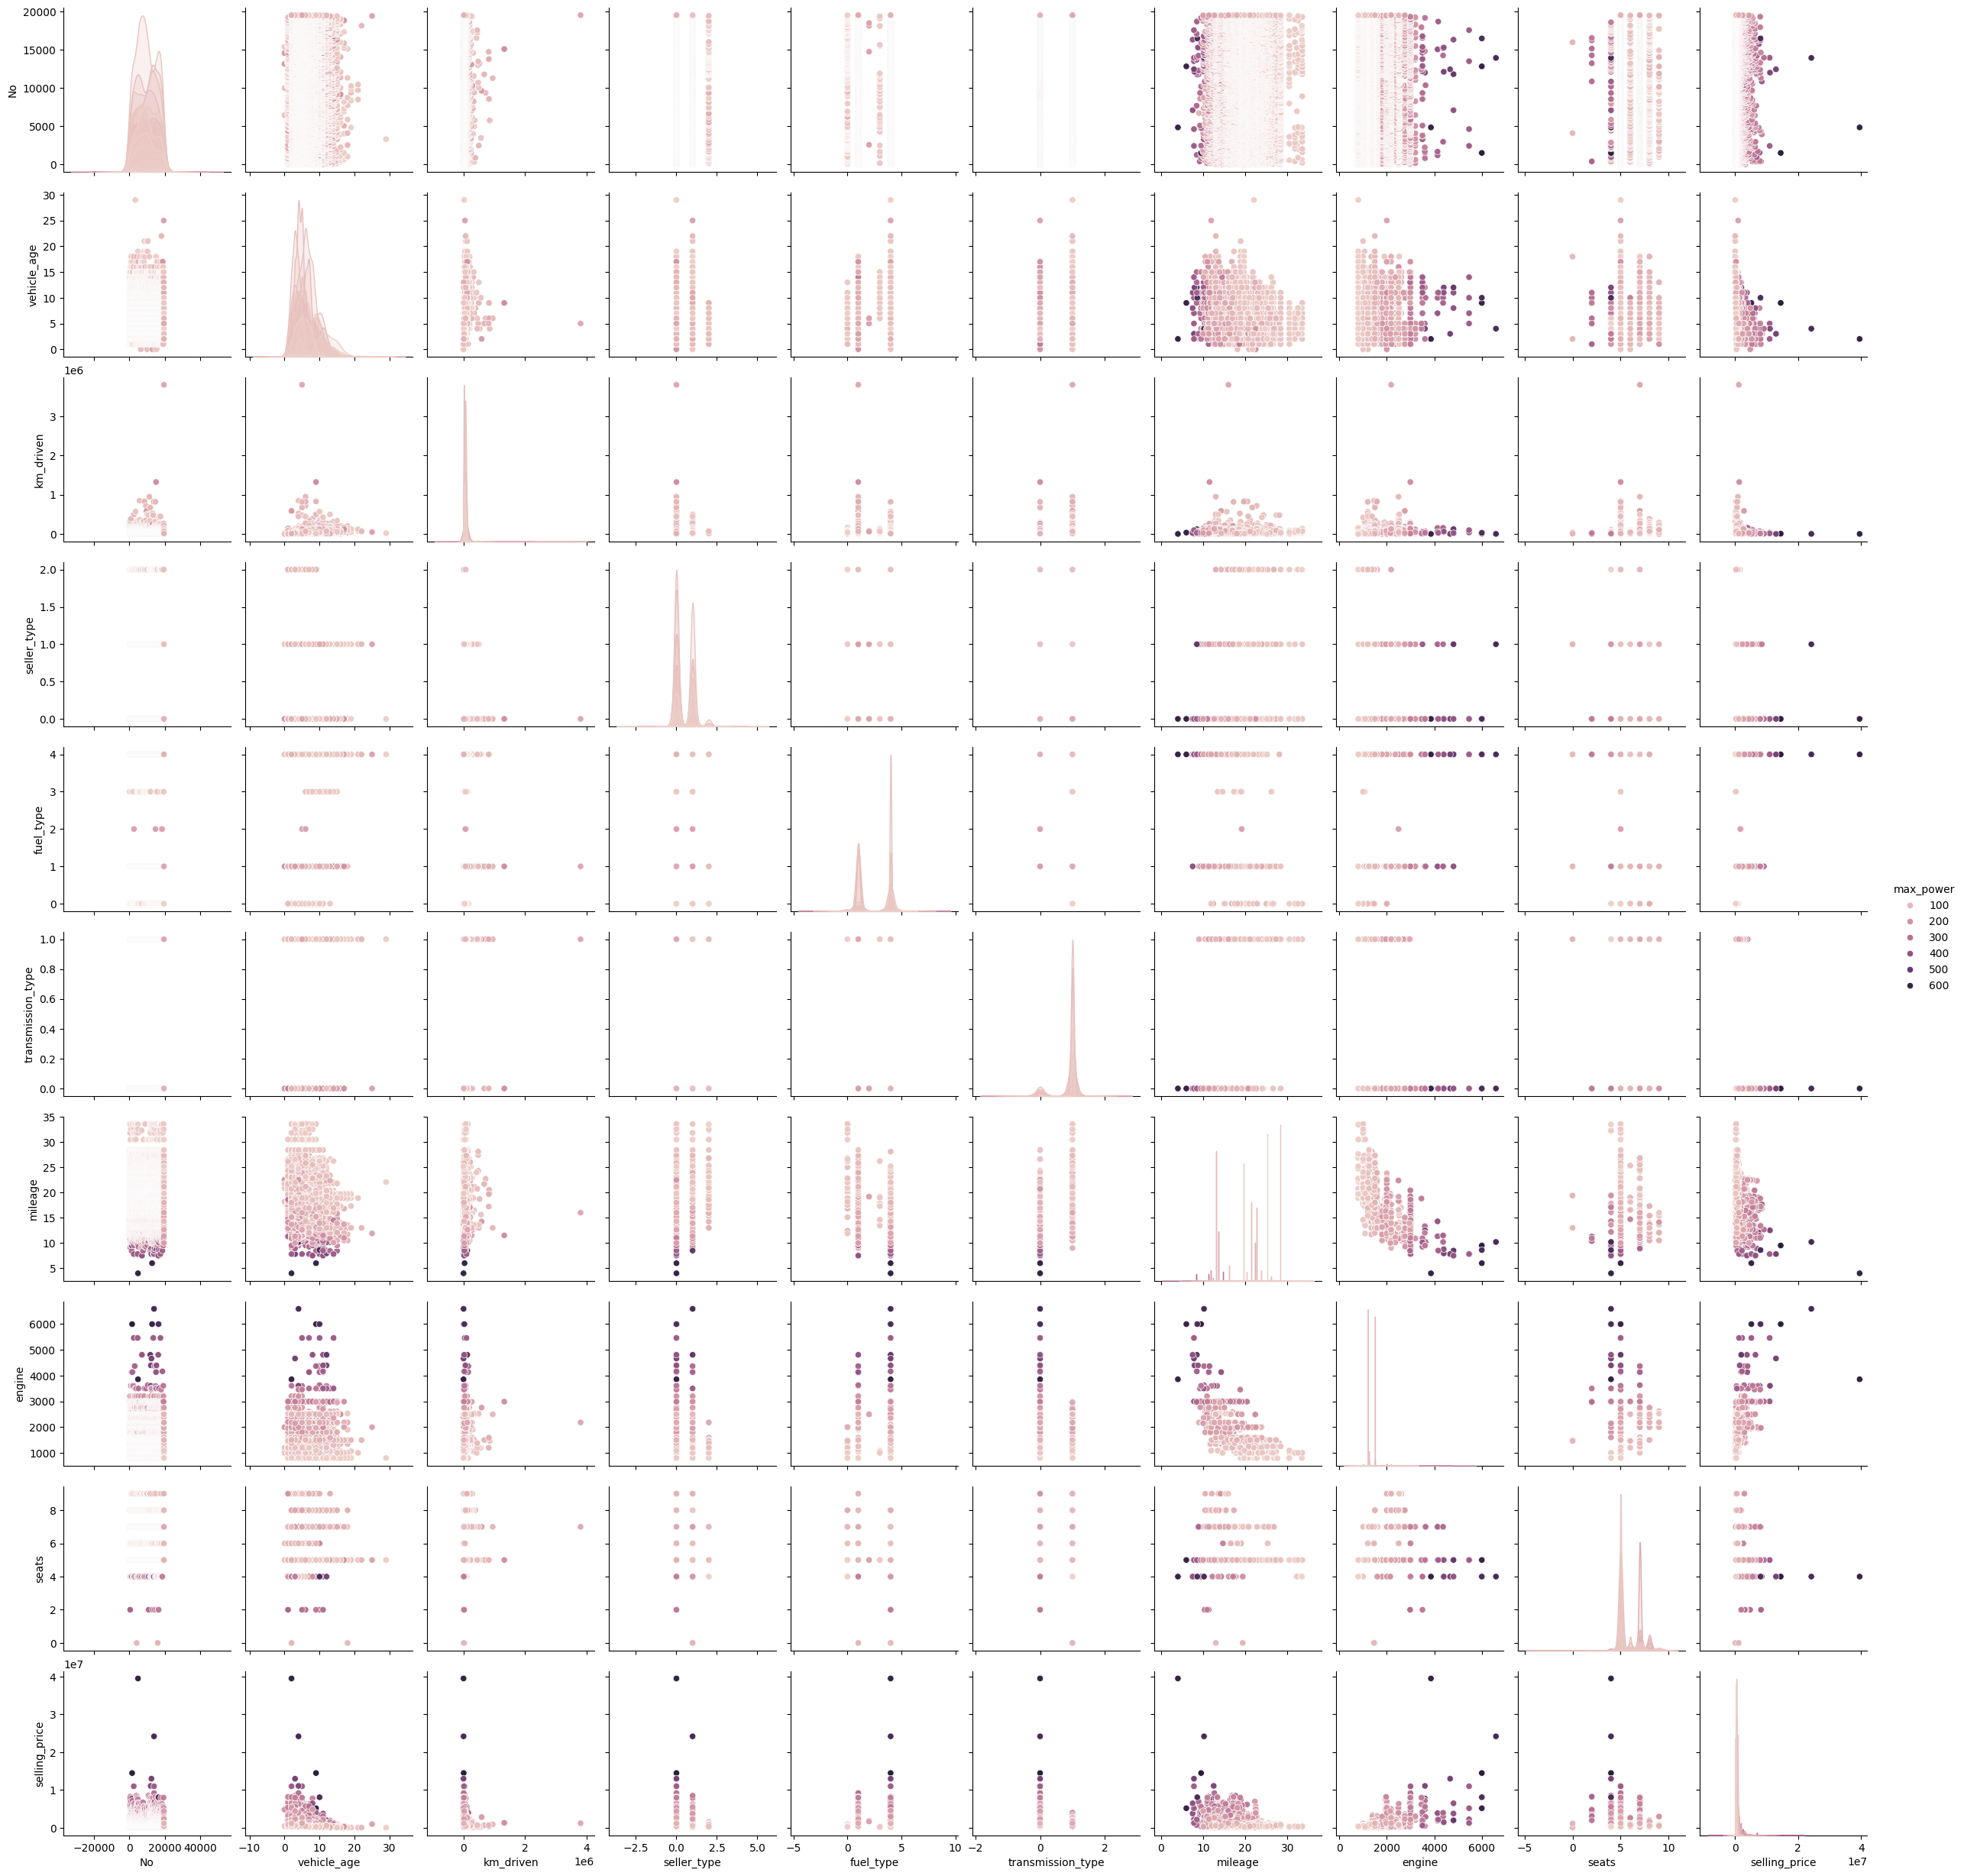

In [3]:
sns.pairplot(data, hue='max_power', diag_kind='kde')
plt.show()

Task 3: Perform feature engineering to select appropriate features.

Using above heatmap we get to know that the we can choose selling_price as the target variable and we can choose 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats' as the feature variables as there correlations are greater than all other features.

In [4]:
# Selecting features for Multiple Linear Regression
# Select features that are numerically correlated with selling_price
X = data[['vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]  # Independent variables
y = data['selling_price']  # Dependent variable

from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')


Training set size: (12328, 9)
Test set size: (3083, 9)


Task 4: Construct multiple linear regression model

Using Multiple linear regression because we have selected only three features as input and one target variable.

In [5]:
from sklearn.linear_model import LinearRegression

# Step 5: Create the Multiple Linear Regression model
model = LinearRegression()

# Step 6: Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Display model coefficients and intercept
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Model Coefficients: [-6.05960808e+04 -1.18016177e+00 -4.39343860e+03 -3.92018077e+03
 -1.12642089e+05  1.55061674e+04  1.01397540e+02  1.49263997e+04
  1.21952794e+04]
Model Intercept: -715795.3817660944


Negative value implies as independent value increases the dependent value decreases.
1.55061674e+04 is the coefficient for 'x1'. It means that for every one-unit increase in 'x1', the model predicts a 1.55061674e+04-unit increase in the target variable 'y', holding all other features constant...like this only it will give x2,x3.....values.

The intercept represents the predicted value of 'y' when all the independent variables ('x1', 'x2','x3',......) are zero. In this case, when 'x1', 'x2','x3',..... are all zero, the model predicts 'y' to be -715795.3817660944.

Task 5: Evaluate the model with appropriate metrics


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

#Calculate rmse
rmse = np.sqrt(mse)

#Calculate mae
mae = mean_absolute_error(y_test, y_pred)


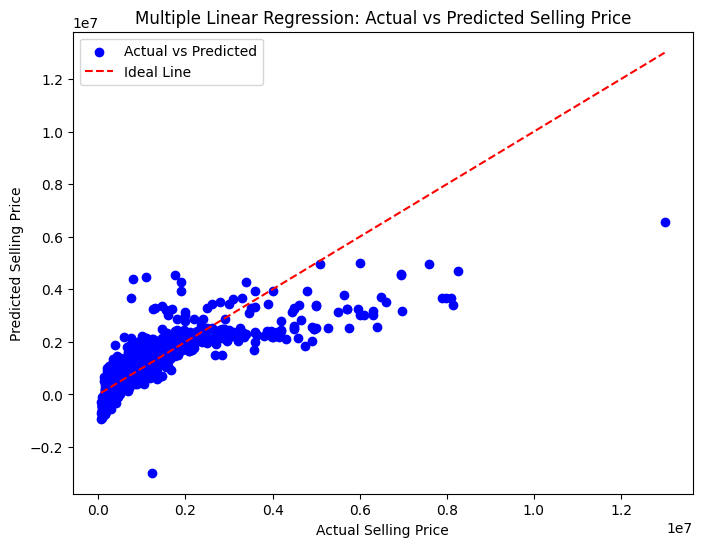

In [8]:
# Visualize Actual vs Predicted selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')

# Customize the plot
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Selling Price')
plt.legend()

# Display the plot
plt.show()

The closer the blue dots are to the red Ideal Line,the better the model's predictions.  Closer points indicate that the predicted Selling Price are close to the Selling Price.

Task 6: Generate the results

In [9]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nMultiple Linear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")



### Model Evaluation Results ###

Multiple Linear Regression Model:
- Mean Squared Error (MSE): 253058551129.39
- R-squared (R²): 0.66
- Root Mean Squared Error (RMSE): 503049.25
- Mean Absolute Error (MAE): 278939.30


A lower MSE indicates that the predictions are closer to the actual values. It penalizes larger errors more heavily because of squaring.

Values range from 0 to 1.
Higher values mean the model explains more variability in the data. For example, R² = 0.80 means 80% of the variance in the target variable is explained by the model.

RMSE makes it easier to understand the error magnitude because it is in the same units as the dependent variable. Lower is better.

Unlike MSE or RMSE, it does not emphasize large errors. It gives a simple, intuitive measure of average prediction error.

MAE shows the average size of prediction errors.
RMSE highlights the effect of large errors (outliers).
R² shows how well the model explains the data.